In [130]:
from IPython.display import Image
from IPython.core.display import HTML 
import os
import pandas as pd
import geopandas as gpd


[x for x in os.listdir("data/")]

['.DS_Store',
 'BAEA_Nests.dbf',
 'BAEA_Nests.prj',
 'BAEA_Nests.qpj',
 'BAEA_Nests.shp',
 'BAEA_Nests.shx',
 'BAEA_sources.csv',
 'BAEA_surveys.csv',
 'BUOWL_Habitat.cpg',
 'BUOWL_Habitat.dbf',
 'BUOWL_Habitat.prj',
 'BUOWL_Habitat.qpj',
 'BUOWL_Habitat.shp',
 'BUOWL_Habitat.shx',
 'colorado_counties.cpg',
 'colorado_counties.dbf',
 'colorado_counties.prj',
 'colorado_counties.qpj',
 'colorado_counties.shp',
 'colorado_counties.shx',
 'DJBasin.gdb',
 'DJBasin.gpkg',
 'GBH_Rookeries.dbf',
 'GBH_Rookeries.prj',
 'GBH_Rookeries.qpj',
 'GBH_Rookeries.sbn',
 'GBH_Rookeries.sbx',
 'GBH_Rookeries.shp',
 'GBH_Rookeries.shx',
 'intersections.gpkg',
 'Linear_Projects.dbf',
 'Linear_Projects.prj',
 'Linear_Projects.qpj',
 'Linear_Projects.sbn',
 'Linear_Projects.sbx',
 'Linear_Projects.shp',
 'Linear_Projects.shx',
 'Overview.mxd',
 'Overview.qgs',
 'Overview.qgs~',
 'POA_2021_AUST_GDA2020.shp',
 'Raptor_Nests.dbf',
 'Raptor_Nests.prj',
 'Raptor_Nests.qpj',
 'Raptor_Nests.shp',
 'Raptor_Nests.sh

# ! Important - Always use set_geometry after creating a Point/String/Polygon

# Get Lat/Lon from Address

In [131]:
from geopy.geocoders import Nominatim
from geopy import geocoders
from geopy.geocoders import GoogleV3

geolocator = Nominatim(user_agent="test") # Free Version
# geolocator = geocoders.GoogleV3(api_key='') # Paid version

df = pd.DataFrame(['24 Power Street, SouthBank, 3006', '450 Pacific Hwy, St. Leonards, 2065', '325 Nelson Road, Mt. Nelson, 7007', '29 Herbert Street, St. Leonards, 2065'], columns = ['Location'])

d = dict(zip(df["Location"], df["Location"].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))))

print(d)



df_new = pd.DataFrame.from_dict(d, orient='index', columns=["latitude", "longitude"])

df_new["extra"] = "A"

df_new

{'24 Power Street, SouthBank, 3006': (-37.8252667, 144.9646411), '450 Pacific Hwy, St. Leonards, 2065': (-33.8232751, 151.1949828), '325 Nelson Road, Mt. Nelson, 7007': (-42.9118129, 147.3226418), '29 Herbert Street, St. Leonards, 2065': (-33.822616, 151.1935314)}


,latitude,longitude,extra
"24 Power Street, SouthBank, 3006",-37.825267,144.964641,A
"450 Pacific Hwy, St. Leonards, 2065",-33.823275,151.194983,A
"325 Nelson Road, Mt. Nelson, 7007",-42.911813,147.322642,A
"29 Herbert Street, St. Leonards, 2065",-33.822616,151.193531,A


# Importing a File

In [132]:
# Import shape file

#Error while opening .shp file. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.
# Fix this issue, after little more understanding the .shp objects.
# Solution is to have all other relevant files that come along with .sho file in one folder!

# Ex.
# v2W2.shp
# v2W2.prj
# v2W2.dbf
# v2W2.shx


polygon = gpd.read_file("data/BUOWL_Habitat.shp", encoding="utf-8")
polygon


,postgis_fi,habitat,hist_occup,recentstat,habitat_id,active2017,geometry
0,15.0,Ground squirrel-mixed Vegetation,Undetermined,NO NESTING ACTIVITY OBSERVED,15,FALSE,"POLYGON ((-104.61687 40.16775, -104.61676 40.1..."
1,41.0,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,41,FALSE,"POLYGON ((-104.65030 40.14220, -104.65014 40.1..."
2,42.0,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,42,FALSE,"POLYGON ((-104.59917 40.11202, -104.59902 40.1..."
3,43.0,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,43,FALSE,"POLYGON ((-104.69383 40.17870, -104.69360 40.1..."
4,54.0,Active Prarie Dog Colony,Undetermined,NO NESTING ACTIVITY OBSERVED,54,FALSE,"POLYGON ((-104.68393 40.19921, -104.68402 40.1..."
...,...,...,...,...,...,...,...
468,447.0,Active Prairie Dog Colony,Yes,ACTIVE NEST,447,FALSE,"POLYGON ((-104.40336 40.46377, -104.40423 40.4..."
469,449.0,Active Prairie Dog Colony,Yes,ACTIVE NEST,449,FALSE,"POLYGON ((-104.38712 40.47787, -104.38716 40.4..."
470,461.0,Active Prairie Dog Colony,Yes,ACTIVE NEST,461,FALSE,"POLYGON ((-104.39052 40.40576, -104.39108 40.4..."
471,486.0,sdafdfadfa,Yes,ACTIVE NEST,486,FALSE,"POLYGON ((-105.08032 40.01568, -105.07959 40.0..."


In [133]:
# Import GeoJson file

polygon_geo = gpd.read_file("data/wildlife_buowl.geojson", encoding="utf-8")
polygon_geo

,postgis_fid,habitat,hist_occup,recentstatus,habitat_id,geometry
0,15,Ground squirrel-mixed Vegetation,Undetermined,NO NESTING ACTIVITY OBSERVED,15,"MULTIPOLYGON (((-104.61687 40.16775, -104.6167..."
1,41,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,41,"MULTIPOLYGON (((-104.65030 40.14220, -104.6501..."
2,42,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,42,"MULTIPOLYGON (((-104.59917 40.11202, -104.5990..."
3,43,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,43,"MULTIPOLYGON (((-104.69383 40.17870, -104.6936..."
4,54,Active Prarie Dog Colony,Undetermined,NO NESTING ACTIVITY OBSERVED,54,"MULTIPOLYGON (((-104.68393 40.19921, -104.6840..."
...,...,...,...,...,...,...
468,447,Active Prairie Dog Colony,Yes,ACTIVE NEST,447,"MULTIPOLYGON (((-104.40336 40.46377, -104.4042..."
469,449,Active Prairie Dog Colony,Yes,ACTIVE NEST,449,"MULTIPOLYGON (((-104.38712 40.47787, -104.3871..."
470,461,Active Prairie Dog Colony,Yes,ACTIVE NEST,461,"MULTIPOLYGON (((-104.39052 40.40576, -104.3910..."
471,486,sdafdfadfa,Yes,ACTIVE NEST,486,"MULTIPOLYGON (((-105.08032 40.01568, -105.0817..."


# Points, Line and Polygons

### What is crs and what to use

A CRS tells Python how coordinates relate to places on Earth. 

4326 is the most common in USA - where as 7844 is what's used in Australia

### How to create a GeoDataFrame from a Normal Pandas DataFrame

A GeoDataFrame has to have a Shapely Object (Series), therefore if all there is, is lat/lon data then these need to be converted into 'Points'.

There can only be one Series that is a geo datatype!

Or you can do it in one step like so:

gdf = gpd.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

In [134]:
# How to create a Point from geo_coords

df_new["geo"] = gpd.points_from_xy(df_new.longitude, df_new.latitude, crs="EPSG:7844")

df_new

,latitude,longitude,extra,geo
"24 Power Street, SouthBank, 3006",-37.825267,144.964641,A,POINT (144.96464 -37.82527)
"450 Pacific Hwy, St. Leonards, 2065",-33.823275,151.194983,A,POINT (151.19498 -33.82328)
"325 Nelson Road, Mt. Nelson, 7007",-42.911813,147.322642,A,POINT (147.32264 -42.91181)
"29 Herbert Street, St. Leonards, 2065",-33.822616,151.193531,A,POINT (151.19353 -33.82262)


In [135]:
# How to get the Lat/Long from a Point
# Dataframe must be a GeoDataFrame first!
# Longitude is x, latitude is y

df_new = gpd.GeoDataFrame(df_new)

df_new["lon_from_point"] = df_new.geo.apply(lambda p: p.x)
df_new["lat_from_point"] = df_new.geo.apply(lambda p: p.y)

df_new = df_new.set_geometry('geo')

df_new

,latitude,longitude,extra,geo,lon_from_point,lat_from_point
"24 Power Street, SouthBank, 3006",-37.825267,144.964641,A,POINT (144.96464 -37.82527),144.964641,-37.825267
"450 Pacific Hwy, St. Leonards, 2065",-33.823275,151.194983,A,POINT (151.19498 -33.82328),151.194983,-33.823275
"325 Nelson Road, Mt. Nelson, 7007",-42.911813,147.322642,A,POINT (147.32264 -42.91181),147.322642,-42.911813
"29 Herbert Street, St. Leonards, 2065",-33.822616,151.193531,A,POINT (151.19353 -33.82262),151.193531,-33.822616


In [136]:
# How to create a Multi-Point from points
from shapely.geometry import MultiPoint, Point

df_new["geo2"] = df_new["geo"].translate(xoff=0.1, yoff=0.0, )
df_new["multi_point"] = [MultiPoint([x,y]) for x, y in zip(df_new.geo, df_new.geo2)]

df_new = df_new.set_geometry('multi_point')

df_new

C:\Users\ryana\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,latitude,longitude,extra,geo,lon_from_point,lat_from_point,geo2,multi_point
"24 Power Street, SouthBank, 3006",-37.825267,144.964641,A,POINT (144.96464 -37.82527),144.964641,-37.825267,POINT (145.06464 -37.82527),"MULTIPOINT (144.96464 -37.82527, 145.06464 -37..."
"450 Pacific Hwy, St. Leonards, 2065",-33.823275,151.194983,A,POINT (151.19498 -33.82328),151.194983,-33.823275,POINT (151.29498 -33.82328),"MULTIPOINT (151.19498 -33.82328, 151.29498 -33..."
"325 Nelson Road, Mt. Nelson, 7007",-42.911813,147.322642,A,POINT (147.32264 -42.91181),147.322642,-42.911813,POINT (147.42264 -42.91181),"MULTIPOINT (147.32264 -42.91181, 147.42264 -42..."
"29 Herbert Street, St. Leonards, 2065",-33.822616,151.193531,A,POINT (151.19353 -33.82262),151.193531,-33.822616,POINT (151.29353 -33.82262),"MULTIPOINT (151.19353 -33.82262, 151.29353 -33..."


In [137]:
# How to create a Line from points
from shapely.geometry import LineString


df_new['line'] = df_new.apply(lambda row: LineString([row['geo'], row['geo2']]), axis=1) 
df_new = df_new.set_geometry('line')

df_new

C:\Users\ryana\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,latitude,longitude,extra,geo,lon_from_point,lat_from_point,geo2,multi_point,line
"24 Power Street, SouthBank, 3006",-37.825267,144.964641,A,POINT (144.96464 -37.82527),144.964641,-37.825267,POINT (145.06464 -37.82527),"MULTIPOINT (144.96464 -37.82527, 145.06464 -37...","LINESTRING (144.96464 -37.82527, 145.06464 -37..."
"450 Pacific Hwy, St. Leonards, 2065",-33.823275,151.194983,A,POINT (151.19498 -33.82328),151.194983,-33.823275,POINT (151.29498 -33.82328),"MULTIPOINT (151.19498 -33.82328, 151.29498 -33...","LINESTRING (151.19498 -33.82328, 151.29498 -33..."
"325 Nelson Road, Mt. Nelson, 7007",-42.911813,147.322642,A,POINT (147.32264 -42.91181),147.322642,-42.911813,POINT (147.42264 -42.91181),"MULTIPOINT (147.32264 -42.91181, 147.42264 -42...","LINESTRING (147.32264 -42.91181, 147.42264 -42..."
"29 Herbert Street, St. Leonards, 2065",-33.822616,151.193531,A,POINT (151.19353 -33.82262),151.193531,-33.822616,POINT (151.29353 -33.82262),"MULTIPOINT (151.19353 -33.82262, 151.29353 -33...","LINESTRING (151.19353 -33.82262, 151.29353 -33..."


In [138]:
# How to create a Multi-Line from points

from shapely.geometry import MultiLineString



df_new["line2"] = df_new["line"].translate(xoff=0.001, yoff=0.0)
df_new["multiline"] = [MultiLineString([x,y]) for x, y in zip(df_new.line, df_new.line2)]

df_new = df_new.set_geometry('multiline')

df_new

C:\Users\ryana\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1785: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


,latitude,longitude,extra,geo,lon_from_point,lat_from_point,geo2,multi_point,line,line2,multiline
"24 Power Street, SouthBank, 3006",-37.825267,144.964641,A,POINT (144.96464 -37.82527),144.964641,-37.825267,POINT (145.06464 -37.82527),"MULTIPOINT (144.96464 -37.82527, 145.06464 -37...","LINESTRING (144.96464 -37.82527, 145.06464 -37...","LINESTRING (144.96564 -37.82527, 145.06564 -37...","MULTILINESTRING ((144.96464 -37.82527, 145.064..."
"450 Pacific Hwy, St. Leonards, 2065",-33.823275,151.194983,A,POINT (151.19498 -33.82328),151.194983,-33.823275,POINT (151.29498 -33.82328),"MULTIPOINT (151.19498 -33.82328, 151.29498 -33...","LINESTRING (151.19498 -33.82328, 151.29498 -33...","LINESTRING (151.19598 -33.82328, 151.29598 -33...","MULTILINESTRING ((151.19498 -33.82328, 151.294..."
"325 Nelson Road, Mt. Nelson, 7007",-42.911813,147.322642,A,POINT (147.32264 -42.91181),147.322642,-42.911813,POINT (147.42264 -42.91181),"MULTIPOINT (147.32264 -42.91181, 147.42264 -42...","LINESTRING (147.32264 -42.91181, 147.42264 -42...","LINESTRING (147.32364 -42.91181, 147.42364 -42...","MULTILINESTRING ((147.32264 -42.91181, 147.422..."
"29 Herbert Street, St. Leonards, 2065",-33.822616,151.193531,A,POINT (151.19353 -33.82262),151.193531,-33.822616,POINT (151.29353 -33.82262),"MULTIPOINT (151.19353 -33.82262, 151.29353 -33...","LINESTRING (151.19353 -33.82262, 151.29353 -33...","LINESTRING (151.19453 -33.82262, 151.29453 -33...","MULTILINESTRING ((151.19353 -33.82262, 151.293..."


In [139]:
# How to create a Polygon from Points - with columns
from shapely.geometry import Polygon

df_new["geo3"] = df_new["geo2"].translate(xoff=0.1, yoff=0.1 )
df_new["geo4"] = df_new["geo3"].translate(xoff=0.1, yoff=0.1 )


def poly(col):
    one = col["geo"]
    two = col["geo2"]
    three = col["geo3"]
    four = col["geo4"]
    
    return Polygon([[one.x, one.y], [two.x, two.y], [three.x, three.y], [four.x, four.y]])
    
    
df_new["col_test"] = df_new.apply(lambda row: poly(row), axis=1)
df_new = df_new.set_geometry('col_test')


df_new[["latitude", "longitude", "col_test"]].explore()

In [140]:
# How to create a Polygon from Points - with rows
from shapely.geometry import Polygon
import numpy as np

# Need to have the first and last coordinate in the list close off the Polygon

lat_list = np.append(df_new["geo"].y.values, df_new["geo"].y.values[-2])
lon_list = np.append(df_new["geo"].x.values, df_new["geo"].x.values[-2]) 

df_new["row_test"] = Polygon(zip(lon_list, lat_list))
df_new = df_new.set_geometry('row_test')

df_new
df_new[["latitude", "longitude", "row_test"]].explore()



In [141]:
# How to create a Polygon from Lines

df_new["line"].iloc[0].coords.xy[0]



array('d', [144.9646411, 145.0646411])

In [142]:
# How to create a Multi_polygon from Polygons
from shapely.geometry import MultiPolygon


def multi_pol(col):
    one = col["col_test"]
    two = col["row_test"]
    return MultiPolygon([one, two])


df_new["multi_pol"] = df_new.apply(lambda row: multi_pol(row), axis=1)
df_new = df_new.set_geometry('multi_pol')

df_new

C:\Users\ryana\anaconda3\lib\site-packages\pandas\core\dtypes\inference.py:388: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
C:\Users\ryana\anaconda3\lib\site-packages\pandas\core\dtypes\inference.py:389: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
C:\Users\ryana\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1785: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


,latitude,longitude,extra,geo,lon_from_point,lat_from_point,geo2,multi_point,line,line2,multiline,geo3,geo4,col_test,row_test,multi_pol
"24 Power Street, SouthBank, 3006",-37.825267,144.964641,A,POINT (144.96464 -37.82527),144.964641,-37.825267,POINT (145.06464 -37.82527),"MULTIPOINT (144.96464 -37.82527, 145.06464 -37...","LINESTRING (144.96464 -37.82527, 145.06464 -37...","LINESTRING (144.96564 -37.82527, 145.06564 -37...","MULTILINESTRING ((144.96464 -37.82527, 145.064...",POINT (145.16464 -37.72527),POINT (145.26464 -37.62527),"POLYGON ((144.96464 -37.82527, 145.06464 -37.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((144.96464 -37.82527, 145.06464..."
"450 Pacific Hwy, St. Leonards, 2065",-33.823275,151.194983,A,POINT (151.19498 -33.82328),151.194983,-33.823275,POINT (151.29498 -33.82328),"MULTIPOINT (151.19498 -33.82328, 151.29498 -33...","LINESTRING (151.19498 -33.82328, 151.29498 -33...","LINESTRING (151.19598 -33.82328, 151.29598 -33...","MULTILINESTRING ((151.19498 -33.82328, 151.294...",POINT (151.39498 -33.72328),POINT (151.49498 -33.62328),"POLYGON ((151.19498 -33.82328, 151.29498 -33.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((151.19498 -33.82328, 151.29498..."
"325 Nelson Road, Mt. Nelson, 7007",-42.911813,147.322642,A,POINT (147.32264 -42.91181),147.322642,-42.911813,POINT (147.42264 -42.91181),"MULTIPOINT (147.32264 -42.91181, 147.42264 -42...","LINESTRING (147.32264 -42.91181, 147.42264 -42...","LINESTRING (147.32364 -42.91181, 147.42364 -42...","MULTILINESTRING ((147.32264 -42.91181, 147.422...",POINT (147.52264 -42.81181),POINT (147.62264 -42.71181),"POLYGON ((147.32264 -42.91181, 147.42264 -42.9...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((147.32264 -42.91181, 147.42264..."
"29 Herbert Street, St. Leonards, 2065",-33.822616,151.193531,A,POINT (151.19353 -33.82262),151.193531,-33.822616,POINT (151.29353 -33.82262),"MULTIPOINT (151.19353 -33.82262, 151.29353 -33...","LINESTRING (151.19353 -33.82262, 151.29353 -33...","LINESTRING (151.19453 -33.82262, 151.29453 -33...","MULTILINESTRING ((151.19353 -33.82262, 151.293...",POINT (151.39353 -33.72262),POINT (151.49353 -33.62262),"POLYGON ((151.19353 -33.82262, 151.29353 -33.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((151.19353 -33.82262, 151.29353..."


In [143]:
# How to determine the distance between 2 points
df_new = df_new.to_crs("EPSG:7844")

from math import radians, cos, sin, asin, sqrt

# def haversine(lon1, lat1, lon2, lat2):
def haversine(col):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    lon1 = col["geo"].x
    lon2 = col["geo2"].x
    lat1 = col["geo"].y
    lat2 = col["geo2"].y
    
    
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in miles. Use 6371 for kilometers
    return c * r




df_new["distance_between_points"] = df_new.apply(lambda row: haversine(row), axis=1)

df_new

,latitude,longitude,extra,geo,lon_from_point,lat_from_point,geo2,multi_point,line,line2,multiline,geo3,geo4,col_test,row_test,multi_pol,distance_between_points
"24 Power Street, SouthBank, 3006",-37.825267,144.964641,A,POINT (144.96464 -37.82527),144.964641,-37.825267,POINT (145.06464 -37.82527),"MULTIPOINT (144.96464 -37.82527, 145.06464 -37...","LINESTRING (144.96464 -37.82527, 145.06464 -37...","LINESTRING (144.96564 -37.82527, 145.06564 -37...","MULTILINESTRING ((144.96464 -37.82527, 145.064...",POINT (145.16464 -37.72527),POINT (145.26464 -37.62527),"POLYGON ((144.96464 -37.82527, 145.06464 -37.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((144.96464 -37.82527, 145.06464...",8.783116
"450 Pacific Hwy, St. Leonards, 2065",-33.823275,151.194983,A,POINT (151.19498 -33.82328),151.194983,-33.823275,POINT (151.29498 -33.82328),"MULTIPOINT (151.19498 -33.82328, 151.29498 -33...","LINESTRING (151.19498 -33.82328, 151.29498 -33...","LINESTRING (151.19598 -33.82328, 151.29598 -33...","MULTILINESTRING ((151.19498 -33.82328, 151.294...",POINT (151.39498 -33.72328),POINT (151.49498 -33.62328),"POLYGON ((151.19498 -33.82328, 151.29498 -33.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((151.19498 -33.82328, 151.29498...",9.237612
"325 Nelson Road, Mt. Nelson, 7007",-42.911813,147.322642,A,POINT (147.32264 -42.91181),147.322642,-42.911813,POINT (147.42264 -42.91181),"MULTIPOINT (147.32264 -42.91181, 147.42264 -42...","LINESTRING (147.32264 -42.91181, 147.42264 -42...","LINESTRING (147.32364 -42.91181, 147.42364 -42...","MULTILINESTRING ((147.32264 -42.91181, 147.422...",POINT (147.52264 -42.81181),POINT (147.62264 -42.71181),"POLYGON ((147.32264 -42.91181, 147.42264 -42.9...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((147.32264 -42.91181, 147.42264...",8.143944
"29 Herbert Street, St. Leonards, 2065",-33.822616,151.193531,A,POINT (151.19353 -33.82262),151.193531,-33.822616,POINT (151.29353 -33.82262),"MULTIPOINT (151.19353 -33.82262, 151.29353 -33...","LINESTRING (151.19353 -33.82262, 151.29353 -33...","LINESTRING (151.19453 -33.82262, 151.29453 -33...","MULTILINESTRING ((151.19353 -33.82262, 151.293...",POINT (151.39353 -33.72262),POINT (151.49353 -33.62262),"POLYGON ((151.19353 -33.82262, 151.29353 -33.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((151.19353 -33.82262, 151.29353...",9.237683


In [144]:
from geopy import distance

def calc_distance(col):
    return distance.distance((col["geo"].y, col["geo"].x), (col["geo2"].y, col["geo2"].x)).km


df_new["distance_between_points_geopy"] = df_new.apply(lambda row: calc_distance(row), axis=1)

df_new

,latitude,longitude,extra,geo,lon_from_point,lat_from_point,geo2,multi_point,line,line2,multiline,geo3,geo4,col_test,row_test,multi_pol,distance_between_points,distance_between_points_geopy
"24 Power Street, SouthBank, 3006",-37.825267,144.964641,A,POINT (144.96464 -37.82527),144.964641,-37.825267,POINT (145.06464 -37.82527),"MULTIPOINT (144.96464 -37.82527, 145.06464 -37...","LINESTRING (144.96464 -37.82527, 145.06464 -37...","LINESTRING (144.96564 -37.82527, 145.06564 -37...","MULTILINESTRING ((144.96464 -37.82527, 145.064...",POINT (145.16464 -37.72527),POINT (145.26464 -37.62527),"POLYGON ((144.96464 -37.82527, 145.06464 -37.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((144.96464 -37.82527, 145.06464...",8.783116,8.804045
"450 Pacific Hwy, St. Leonards, 2065",-33.823275,151.194983,A,POINT (151.19498 -33.82328),151.194983,-33.823275,POINT (151.29498 -33.82328),"MULTIPOINT (151.19498 -33.82328, 151.29498 -33...","LINESTRING (151.19498 -33.82328, 151.29498 -33...","LINESTRING (151.19598 -33.82328, 151.29598 -33...","MULTILINESTRING ((151.19498 -33.82328, 151.294...",POINT (151.39498 -33.72328),POINT (151.49498 -33.62328),"POLYGON ((151.19498 -33.82328, 151.29498 -33.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((151.19498 -33.82328, 151.29498...",9.237612,9.257566
"325 Nelson Road, Mt. Nelson, 7007",-42.911813,147.322642,A,POINT (147.32264 -42.91181),147.322642,-42.911813,POINT (147.42264 -42.91181),"MULTIPOINT (147.32264 -42.91181, 147.42264 -42...","LINESTRING (147.32264 -42.91181, 147.42264 -42...","LINESTRING (147.32364 -42.91181, 147.42364 -42...","MULTILINESTRING ((147.32264 -42.91181, 147.422...",POINT (147.52264 -42.81181),POINT (147.62264 -42.71181),"POLYGON ((147.32264 -42.91181, 147.42264 -42.9...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((147.32264 -42.91181, 147.42264...",8.143944,8.165748
"29 Herbert Street, St. Leonards, 2065",-33.822616,151.193531,A,POINT (151.19353 -33.82262),151.193531,-33.822616,POINT (151.29353 -33.82262),"MULTIPOINT (151.19353 -33.82262, 151.29353 -33...","LINESTRING (151.19353 -33.82262, 151.29353 -33...","LINESTRING (151.19453 -33.82262, 151.29453 -33...","MULTILINESTRING ((151.19353 -33.82262, 151.293...",POINT (151.39353 -33.72262),POINT (151.49353 -33.62262),"POLYGON ((151.19353 -33.82262, 151.29353 -33.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((151.19353 -33.82262, 151.29353...",9.237683,9.257637


In [145]:
# How to determine the distance of a line

from pyproj import Geod

def line_length(col):
    
    line = col["line"]
    geod = Geod(ellps="WGS84")
    return geod.geometry_length(line)



df_new["line_length_m"] = df_new.apply(lambda row: line_length(row), axis=1)

df_new



,latitude,longitude,extra,geo,lon_from_point,lat_from_point,geo2,multi_point,line,line2,multiline,geo3,geo4,col_test,row_test,multi_pol,distance_between_points,distance_between_points_geopy,line_length_m
"24 Power Street, SouthBank, 3006",-37.825267,144.964641,A,POINT (144.96464 -37.82527),144.964641,-37.825267,POINT (145.06464 -37.82527),"MULTIPOINT (144.96464 -37.82527, 145.06464 -37...","LINESTRING (144.96464 -37.82527, 145.06464 -37...","LINESTRING (144.96564 -37.82527, 145.06564 -37...","MULTILINESTRING ((144.96464 -37.82527, 145.064...",POINT (145.16464 -37.72527),POINT (145.26464 -37.62527),"POLYGON ((144.96464 -37.82527, 145.06464 -37.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((144.96464 -37.82527, 145.06464...",8.783116,8.804045,8804.044980
"450 Pacific Hwy, St. Leonards, 2065",-33.823275,151.194983,A,POINT (151.19498 -33.82328),151.194983,-33.823275,POINT (151.29498 -33.82328),"MULTIPOINT (151.19498 -33.82328, 151.29498 -33...","LINESTRING (151.19498 -33.82328, 151.29498 -33...","LINESTRING (151.19598 -33.82328, 151.29598 -33...","MULTILINESTRING ((151.19498 -33.82328, 151.294...",POINT (151.39498 -33.72328),POINT (151.49498 -33.62328),"POLYGON ((151.19498 -33.82328, 151.29498 -33.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((151.19498 -33.82328, 151.29498...",9.237612,9.257566,9257.566004
"325 Nelson Road, Mt. Nelson, 7007",-42.911813,147.322642,A,POINT (147.32264 -42.91181),147.322642,-42.911813,POINT (147.42264 -42.91181),"MULTIPOINT (147.32264 -42.91181, 147.42264 -42...","LINESTRING (147.32264 -42.91181, 147.42264 -42...","LINESTRING (147.32364 -42.91181, 147.42364 -42...","MULTILINESTRING ((147.32264 -42.91181, 147.422...",POINT (147.52264 -42.81181),POINT (147.62264 -42.71181),"POLYGON ((147.32264 -42.91181, 147.42264 -42.9...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((147.32264 -42.91181, 147.42264...",8.143944,8.165748,8165.747996
"29 Herbert Street, St. Leonards, 2065",-33.822616,151.193531,A,POINT (151.19353 -33.82262),151.193531,-33.822616,POINT (151.29353 -33.82262),"MULTIPOINT (151.19353 -33.82262, 151.29353 -33...","LINESTRING (151.19353 -33.82262, 151.29353 -33...","LINESTRING (151.19453 -33.82262, 151.29453 -33...","MULTILINESTRING ((151.19353 -33.82262, 151.293...",POINT (151.39353 -33.72262),POINT (151.49353 -33.62262),"POLYGON ((151.19353 -33.82262, 151.29353 -33.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((151.19353 -33.82262, 151.29353...",9.237683,9.257637,9257.637028


In [146]:
# How to determine the mid point of the line

# https://gis.stackexchange.com/questions/401311/creating-linestring-from-two-points-and-finding-mid-point

df_new['midpoint'] = df_new.apply(lambda row: row['line'].centroid, axis=1) #Find centroid

df_new

C:\Users\ryana\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,latitude,longitude,extra,geo,lon_from_point,lat_from_point,geo2,multi_point,line,line2,multiline,geo3,geo4,col_test,row_test,multi_pol,distance_between_points,distance_between_points_geopy,line_length_m,midpoint
"24 Power Street, SouthBank, 3006",-37.825267,144.964641,A,POINT (144.96464 -37.82527),144.964641,-37.825267,POINT (145.06464 -37.82527),"MULTIPOINT (144.96464 -37.82527, 145.06464 -37...","LINESTRING (144.96464 -37.82527, 145.06464 -37...","LINESTRING (144.96564 -37.82527, 145.06564 -37...","MULTILINESTRING ((144.96464 -37.82527, 145.064...",POINT (145.16464 -37.72527),POINT (145.26464 -37.62527),"POLYGON ((144.96464 -37.82527, 145.06464 -37.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((144.96464 -37.82527, 145.06464...",8.783116,8.804045,8804.044980,POINT (145.0146411 -37.8252667)
"450 Pacific Hwy, St. Leonards, 2065",-33.823275,151.194983,A,POINT (151.19498 -33.82328),151.194983,-33.823275,POINT (151.29498 -33.82328),"MULTIPOINT (151.19498 -33.82328, 151.29498 -33...","LINESTRING (151.19498 -33.82328, 151.29498 -33...","LINESTRING (151.19598 -33.82328, 151.29598 -33...","MULTILINESTRING ((151.19498 -33.82328, 151.294...",POINT (151.39498 -33.72328),POINT (151.49498 -33.62328),"POLYGON ((151.19498 -33.82328, 151.29498 -33.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((151.19498 -33.82328, 151.29498...",9.237612,9.257566,9257.566004,POINT (151.2449828 -33.8232751)
"325 Nelson Road, Mt. Nelson, 7007",-42.911813,147.322642,A,POINT (147.32264 -42.91181),147.322642,-42.911813,POINT (147.42264 -42.91181),"MULTIPOINT (147.32264 -42.91181, 147.42264 -42...","LINESTRING (147.32264 -42.91181, 147.42264 -42...","LINESTRING (147.32364 -42.91181, 147.42364 -42...","MULTILINESTRING ((147.32264 -42.91181, 147.422...",POINT (147.52264 -42.81181),POINT (147.62264 -42.71181),"POLYGON ((147.32264 -42.91181, 147.42264 -42.9...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((147.32264 -42.91181, 147.42264...",8.143944,8.165748,8165.747996,POINT (147.3726418 -42.91181290000001)
"29 Herbert Street, St. Leonards, 2065",-33.822616,151.193531,A,POINT (151.19353 -33.82262),151.193531,-33.822616,POINT (151.29353 -33.82262),"MULTIPOINT (151.19353 -33.82262, 151.29353 -33...","LINESTRING (151.19353 -33.82262, 151.29353 -33...","LINESTRING (151.19453 -33.82262, 151.29453 -33...","MULTILINESTRING ((151.19353 -33.82262, 151.293...",POINT (151.39353 -33.72262),POINT (151.49353 -33.62262),"POLYGON ((151.19353 -33.82262, 151.29353 -33.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((151.19353 -33.82262, 151.29353...",9.237683,9.257637,9257.637028,POINT (151.2435314 -33.822616)


In [147]:
# How to determine the perimeter length of a polygon

from pyproj import Geod

def poly_perimeter(col):
    
    poly = col["row_test"]
    geod = Geod(ellps="WGS84")
    return geod.geometry_length(poly)



df_new["poly_perimeter_m"] = df_new.apply(lambda row: poly_perimeter(row), axis=1)

df_new

,latitude,longitude,extra,geo,lon_from_point,lat_from_point,geo2,multi_point,line,line2,...,geo3,geo4,col_test,row_test,multi_pol,distance_between_points,distance_between_points_geopy,line_length_m,midpoint,poly_perimeter_m
"24 Power Street, SouthBank, 3006",-37.825267,144.964641,A,POINT (144.96464 -37.82527),144.964641,-37.825267,POINT (145.06464 -37.82527),"MULTIPOINT (144.96464 -37.82527, 145.06464 -37...","LINESTRING (144.96464 -37.82527, 145.06464 -37...","LINESTRING (144.96564 -37.82527, 145.06564 -37...",...,POINT (145.16464 -37.72527),POINT (145.26464 -37.62527),"POLYGON ((144.96464 -37.82527, 145.06464 -37.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((144.96464 -37.82527, 145.06464...",8.783116,8.804045,8804.044980,POINT (145.0146411 -37.8252667),4.507319e+06
"450 Pacific Hwy, St. Leonards, 2065",-33.823275,151.194983,A,POINT (151.19498 -33.82328),151.194983,-33.823275,POINT (151.29498 -33.82328),"MULTIPOINT (151.19498 -33.82328, 151.29498 -33...","LINESTRING (151.19498 -33.82328, 151.29498 -33...","LINESTRING (151.19598 -33.82328, 151.29598 -33...",...,POINT (151.39498 -33.72328),POINT (151.49498 -33.62328),"POLYGON ((151.19498 -33.82328, 151.29498 -33.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((151.19498 -33.82328, 151.29498...",9.237612,9.257566,9257.566004,POINT (151.2449828 -33.8232751),4.507319e+06
"325 Nelson Road, Mt. Nelson, 7007",-42.911813,147.322642,A,POINT (147.32264 -42.91181),147.322642,-42.911813,POINT (147.42264 -42.91181),"MULTIPOINT (147.32264 -42.91181, 147.42264 -42...","LINESTRING (147.32264 -42.91181, 147.42264 -42...","LINESTRING (147.32364 -42.91181, 147.42364 -42...",...,POINT (147.52264 -42.81181),POINT (147.62264 -42.71181),"POLYGON ((147.32264 -42.91181, 147.42264 -42.9...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((147.32264 -42.91181, 147.42264...",8.143944,8.165748,8165.747996,POINT (147.3726418 -42.91181290000001),4.507319e+06
"29 Herbert Street, St. Leonards, 2065",-33.822616,151.193531,A,POINT (151.19353 -33.82262),151.193531,-33.822616,POINT (151.29353 -33.82262),"MULTIPOINT (151.19353 -33.82262, 151.29353 -33...","LINESTRING (151.19353 -33.82262, 151.29353 -33...","LINESTRING (151.19453 -33.82262, 151.29453 -33...",...,POINT (151.39353 -33.72262),POINT (151.49353 -33.62262),"POLYGON ((151.19353 -33.82262, 151.29353 -33.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((151.19353 -33.82262, 151.29353...",9.237683,9.257637,9257.637028,POINT (151.2435314 -33.822616),4.507319e+06


In [148]:
# How to determine the area of a polygon
from pyproj import Geod


def poly_area(col):
    poly = col["col_test"]
    geod = Geod(ellps="WGS84")
    poly_area, poly_perimeter = geod.geometry_area_perimeter(poly)
    return poly_area

df_new["polygon_area_m"] = df_new.apply(lambda row: poly_area(row), axis=1)

df_new

,latitude,longitude,extra,geo,lon_from_point,lat_from_point,geo2,multi_point,line,line2,...,geo4,col_test,row_test,multi_pol,distance_between_points,distance_between_points_geopy,line_length_m,midpoint,poly_perimeter_m,polygon_area_m
"24 Power Street, SouthBank, 3006",-37.825267,144.964641,A,POINT (144.96464 -37.82527),144.964641,-37.825267,POINT (145.06464 -37.82527),"MULTIPOINT (144.96464 -37.82527, 145.06464 -37...","LINESTRING (144.96464 -37.82527, 145.06464 -37...","LINESTRING (144.96564 -37.82527, 145.06564 -37...",...,POINT (145.26464 -37.62527),"POLYGON ((144.96464 -37.82527, 145.06464 -37.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((144.96464 -37.82527, 145.06464...",8.783116,8.804045,8804.044980,POINT (145.0146411 -37.8252667),4.507319e+06,9.741894e+07
"450 Pacific Hwy, St. Leonards, 2065",-33.823275,151.194983,A,POINT (151.19498 -33.82328),151.194983,-33.823275,POINT (151.29498 -33.82328),"MULTIPOINT (151.19498 -33.82328, 151.29498 -33...","LINESTRING (151.19498 -33.82328, 151.29498 -33...","LINESTRING (151.19598 -33.82328, 151.29598 -33...",...,POINT (151.49498 -33.62328),"POLYGON ((151.19498 -33.82328, 151.29498 -33.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((151.19498 -33.82328, 151.29498...",9.237612,9.257566,9257.566004,POINT (151.2449828 -33.8232751),4.507319e+06,1.023961e+08
"325 Nelson Road, Mt. Nelson, 7007",-42.911813,147.322642,A,POINT (147.32264 -42.91181),147.322642,-42.911813,POINT (147.42264 -42.91181),"MULTIPOINT (147.32264 -42.91181, 147.42264 -42...","LINESTRING (147.32264 -42.91181, 147.42264 -42...","LINESTRING (147.32364 -42.91181, 147.42364 -42...",...,POINT (147.62264 -42.71181),"POLYGON ((147.32264 -42.91181, 147.42264 -42.9...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((147.32264 -42.91181, 147.42264...",8.143944,8.165748,8165.747996,POINT (147.3726418 -42.91181290000001),4.507319e+06,9.040676e+07
"29 Herbert Street, St. Leonards, 2065",-33.822616,151.193531,A,POINT (151.19353 -33.82262),151.193531,-33.822616,POINT (151.29353 -33.82262),"MULTIPOINT (151.19353 -33.82262, 151.29353 -33...","LINESTRING (151.19353 -33.82262, 151.29353 -33...","LINESTRING (151.19453 -33.82262, 151.29453 -33...",...,POINT (151.49353 -33.62262),"POLYGON ((151.19353 -33.82262, 151.29353 -33.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((151.19353 -33.82262, 151.29353...",9.237683,9.257637,9257.637028,POINT (151.2435314 -33.822616),4.507319e+06,1.023969e+08


In [149]:
# How to create a Bounding Box around a GeoSeries (polygon)
from shapely.geometry import box

df_new["bounding_box"] = df_new.apply(lambda row: box(*row["col_test"].bounds), axis=1)
df_new = df_new.set_geometry('bounding_box')

df_new

,latitude,longitude,extra,geo,lon_from_point,lat_from_point,geo2,multi_point,line,line2,...,col_test,row_test,multi_pol,distance_between_points,distance_between_points_geopy,line_length_m,midpoint,poly_perimeter_m,polygon_area_m,bounding_box
"24 Power Street, SouthBank, 3006",-37.825267,144.964641,A,POINT (144.96464 -37.82527),144.964641,-37.825267,POINT (145.06464 -37.82527),"MULTIPOINT (144.96464 -37.82527, 145.06464 -37...","LINESTRING (144.96464 -37.82527, 145.06464 -37...","LINESTRING (144.96564 -37.82527, 145.06564 -37...",...,"POLYGON ((144.96464 -37.82527, 145.06464 -37.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((144.96464 -37.82527, 145.06464...",8.783116,8.804045,8804.044980,POINT (145.0146411 -37.8252667),4.507319e+06,9.741894e+07,"POLYGON ((145.26464 -37.82527, 145.26464 -37.6..."
"450 Pacific Hwy, St. Leonards, 2065",-33.823275,151.194983,A,POINT (151.19498 -33.82328),151.194983,-33.823275,POINT (151.29498 -33.82328),"MULTIPOINT (151.19498 -33.82328, 151.29498 -33...","LINESTRING (151.19498 -33.82328, 151.29498 -33...","LINESTRING (151.19598 -33.82328, 151.29598 -33...",...,"POLYGON ((151.19498 -33.82328, 151.29498 -33.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((151.19498 -33.82328, 151.29498...",9.237612,9.257566,9257.566004,POINT (151.2449828 -33.8232751),4.507319e+06,1.023961e+08,"POLYGON ((151.49498 -33.82328, 151.49498 -33.6..."
"325 Nelson Road, Mt. Nelson, 7007",-42.911813,147.322642,A,POINT (147.32264 -42.91181),147.322642,-42.911813,POINT (147.42264 -42.91181),"MULTIPOINT (147.32264 -42.91181, 147.42264 -42...","LINESTRING (147.32264 -42.91181, 147.42264 -42...","LINESTRING (147.32364 -42.91181, 147.42364 -42...",...,"POLYGON ((147.32264 -42.91181, 147.42264 -42.9...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((147.32264 -42.91181, 147.42264...",8.143944,8.165748,8165.747996,POINT (147.3726418 -42.91181290000001),4.507319e+06,9.040676e+07,"POLYGON ((147.62264 -42.91181, 147.62264 -42.7..."
"29 Herbert Street, St. Leonards, 2065",-33.822616,151.193531,A,POINT (151.19353 -33.82262),151.193531,-33.822616,POINT (151.29353 -33.82262),"MULTIPOINT (151.19353 -33.82262, 151.29353 -33...","LINESTRING (151.19353 -33.82262, 151.29353 -33...","LINESTRING (151.19453 -33.82262, 151.29453 -33...",...,"POLYGON ((151.19353 -33.82262, 151.29353 -33.8...","POLYGON ((144.96464 -37.82527, 151.19498 -33.8...","MULTIPOLYGON (((151.19353 -33.82262, 151.29353...",9.237683,9.257637,9257.637028,POINT (151.2435314 -33.822616),4.507319e+06,1.023969e+08,"POLYGON ((151.49353 -33.82262, 151.49353 -33.6..."


# Visualisation

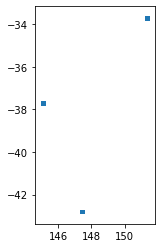

In [150]:
# Simple plot
df_new.plot()

In [151]:
# Explore plot
# The 'folium', 'matplotlib' and 'mapclassify' packages are required for 'explore()'
# To activate explore mode 'pip install folium matplotlib mapclassify'

df_new = df_new.set_geometry('bounding_box') # Make sure you set the geometry you want to render first

df_new[["latitude", "longitude", "bounding_box"]].explore()

# Constructive Methods 
## On a Series

In [152]:
# Buffer - expand the polygon's radius by a distance

# The approximate conversions are: Latitude: 1 deg = 110.574 km. Longitude: 1 deg = 111.320*cos(latitude) km.


df_new["buffer"] = df_new.apply(lambda row: row["col_test"].buffer(distance=0.1), axis=1)

df_new = df_new.set_geometry('buffer')



df_new[["latitude", "longitude", "buffer"]].explore()


In [153]:
# Boundary - Returns a line of the polygon boundary

df_new["boundary_line"] = df_new.apply(lambda row: row["buffer"].boundary, axis=1)

df_new = df_new.set_geometry('boundary_line')



df_new[["latitude", "longitude", "boundary_line"]].explore()

C:\Users\ryana\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [154]:
# Centroid - Returns the middle of the polygon

df_new["centroid"] = df_new.apply(lambda row: row["buffer"].centroid, axis=1)

df_new = df_new.set_geometry('centroid')



df_new[["latitude", "longitude", "centroid"]].explore()

C:\Users\ryana\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [155]:
# convex_hull - Returns the smallest polygon containing all the points in each object
# (good for developing polygons from points?)

df_new["convex_hull"] = df_new.apply(lambda row: row["buffer"].convex_hull, axis=1)

df_new = df_new.set_geometry('convex_hull')



df_new[["latitude", "longitude", "convex_hull"]].explore()

In [156]:
# Envelope - Returns the smallest rectangle polygon

df_new["envelope"] = df_new.apply(lambda row: row["buffer"].envelope, axis=1)

df_new = df_new.set_geometry('envelope')



df_new[["latitude", "longitude", "envelope"]].explore()

In [157]:
# Unary_Union - Creates a multi-polygon from a seires of polygons (Can have space between polygons)

# Affine Transformations
## On a Series

In [158]:
# Scale - Increase the size of a line/polygon across the x,y,z axis

In [159]:
# Translate - Shift (Offset) the coordinates of the polygon by latitude/longitude measurements

# Set-Operations
## Overlay

![Image](https://geopandas.org/en/stable/_images/overlay_operations.png)

In [160]:
# Intersection - When 2 polygons run into each other you can create a new polygon with the intersection

In [161]:
# Union - Group 2 Polygons together to create 1 large polygon (with lining)
# See disolve to remove lining from original polygons

In [162]:
# Symetrical Difference - Include everything except for what is shared between polygons

In [163]:
# Difference - Return 1 of 2 Polygons minus any sharing

# Joins

In [164]:
# Attribute Joins - Same as normal pandas merge join (bring more no spatial fields into a GeoDataFrame)

In [165]:
# Spatial Join - Determine if a point/line falls withiin a polygon using a join

In [166]:
# Nearest Joins
# Proximity-based joins can be done via GeoDataFrame.sjoin_nearest().

# Aggregation

In [167]:
# Disolve - After a union, group all the polygon together without the original outline
# There is an aggfunc param which allows you to apply a measure as you group all the polygons together
# .dissolve(by='continent', aggfunc='sum')

# Exporting

In [168]:
# To Shape file

In [169]:
# To GeoJson

In [170]:
# Convert Shape file to GeoJson

polygon.to_file('myshpfile.geojson', driver='GeoJSON')
df = gpd.read_file('myshpfile.geojson')
df

C:\Users\ryana\anaconda3\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


,postgis_fi,habitat,hist_occup,recentstat,habitat_id,active2017,geometry
0,15.0,Ground squirrel-mixed Vegetation,Undetermined,NO NESTING ACTIVITY OBSERVED,15,FALSE,"POLYGON ((-104.61687 40.16775, -104.61676 40.1..."
1,41.0,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,41,FALSE,"POLYGON ((-104.65030 40.14220, -104.65014 40.1..."
2,42.0,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,42,FALSE,"POLYGON ((-104.59917 40.11202, -104.59902 40.1..."
3,43.0,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,43,FALSE,"POLYGON ((-104.69383 40.17870, -104.69360 40.1..."
4,54.0,Active Prarie Dog Colony,Undetermined,NO NESTING ACTIVITY OBSERVED,54,FALSE,"POLYGON ((-104.68393 40.19921, -104.68402 40.1..."
...,...,...,...,...,...,...,...
468,447.0,Active Prairie Dog Colony,Yes,ACTIVE NEST,447,FALSE,"POLYGON ((-104.40336 40.46377, -104.40423 40.4..."
469,449.0,Active Prairie Dog Colony,Yes,ACTIVE NEST,449,FALSE,"POLYGON ((-104.38712 40.47787, -104.38716 40.4..."
470,461.0,Active Prairie Dog Colony,Yes,ACTIVE NEST,461,FALSE,"POLYGON ((-104.39052 40.40576, -104.39108 40.4..."
471,486.0,sdafdfadfa,Yes,ACTIVE NEST,486,FALSE,"POLYGON ((-105.08032 40.01568, -105.07959 40.0..."
